# Assignment 3

## Binary Classification of Cat-Dog Dataset

### Using CNN

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
source_path ="C:/Users/Malini/Desktop/HappyMonks AI"

source_path_dogs = os.path.join("C:/Users/Malini/Desktop/HappyMonks AI", 'dog')
source_path_cats = os.path.join("C:/Users/Malini/Desktop/HappyMonks AI", 'cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 1600 images of dogs.
There are 1600 images of cats.


In [3]:
root_dir = "C:/Users/Malini/Desktop/train_val"
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  
  os.mkdir(root_path)
  train_dir = os.path.join(root_path, 'training')
  os.mkdir(train_dir)
  val_dir = os.path.join(root_path, 'validation')
  os.mkdir(val_dir)
  cat_train_dir = os.path.join(train_dir, 'cats')
  os.mkdir(cat_train_dir)
  dog_train_dir = os.path.join(train_dir, 'dogs')
  os.mkdir(dog_train_dir)

  cat_val_dir = os.path.join(val_dir, 'cats')
  os.mkdir(cat_val_dir)
  dog_val_dir = os.path.join(val_dir, 'dogs')
  os.mkdir(dog_val_dir)
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
# Test your create_train_val_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:/Users/Malini/Desktop/train_val\training
C:/Users/Malini/Desktop/train_val\validation
C:/Users/Malini/Desktop/train_val\training\cats
C:/Users/Malini/Desktop/train_val\training\dogs
C:/Users/Malini/Desktop/train_val\validation\cats
C:/Users/Malini/Desktop/train_val\validation\dogs


In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  source_list = os.listdir(SOURCE_DIR)
  
  train_list = random.sample(source_list, int(len(source_list)*SPLIT_SIZE))

  for img in source_list:
    if os.path.getsize(os.path.join(SOURCE_DIR, img)) == 0:
      print(img + "is zero length, so ignoring.")
    elif img in train_list:
      copyfile(os.path.join(SOURCE_DIR, img), os.path.join(TRAINING_DIR, img))
    else:
      copyfile(os.path.join(SOURCE_DIR, img), os.path.join(VALIDATION_DIR, img))

In [6]:
# Define paths
CAT_SOURCE_DIR = "C:/Users/Malini/Desktop/HappyMonks AI/cat"
DOG_SOURCE_DIR = "C:/Users/Malini/Desktop/HappyMonks AI/dog"

TRAINING_DIR = "C:/Users/Malini/Desktop/train_val/training"
VALIDATION_DIR = "C:/Users/Malini/Desktop/train_val/validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")



Original cat's directory has 1600 images
Original dog's directory has 1600 images

There are 1440 images of cats for training
There are 1440 images of dogs for training
There are 160 images of cats for validation
There are 160 images of dogs for validation


In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class for both training and validation
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(200, 200))

    validation_datagen = ImageDataGenerator(rescale=1/255)
   
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='binary',
                                                                target_size=(200, 200))
    return train_generator, validation_generator

In [8]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2880 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [9]:
# create_model for CNN using 4 CONVOLUTION LAYERS 
def create_model():
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(), 
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'), 
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
    return model

In [10]:
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [11]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,callbacks=[early_stop])



Epoch 1/15
144/144 [==============================] - 35s 239ms/step - loss: 0.6939 - accuracy: 0.5410 - val_loss: 0.7812 - val_accuracy: 0.5063
Epoch 2/15
144/144 [==============================] - 39s 272ms/step - loss: 0.6509 - accuracy: 0.6257 - val_loss: 0.6453 - val_accuracy: 0.6531
Epoch 3/15
144/144 [==============================] - 40s 278ms/step - loss: 0.5880 - accuracy: 0.6878 - val_loss: 0.6188 - val_accuracy: 0.7125
Epoch 4/15
144/144 [==============================] - 41s 286ms/step - loss: 0.5194 - accuracy: 0.7483 - val_loss: 0.5932 - val_accuracy: 0.6844
Epoch 5/15
144/144 [==============================] - 41s 285ms/step - loss: 0.4409 - accuracy: 0.7931 - val_loss: 0.5698 - val_accuracy: 0.7437
Epoch 6/15
144/144 [==============================] - 41s 285ms/step - loss: 0.3640 - accuracy: 0.8361 - val_loss: 0.6053 - val_accuracy: 0.7125
Epoch 7/15
144/144 [==============================] - 43s 296ms/step - loss: 0.2783 - accuracy: 0.8885 - val_loss: 0.7135 - val_ac

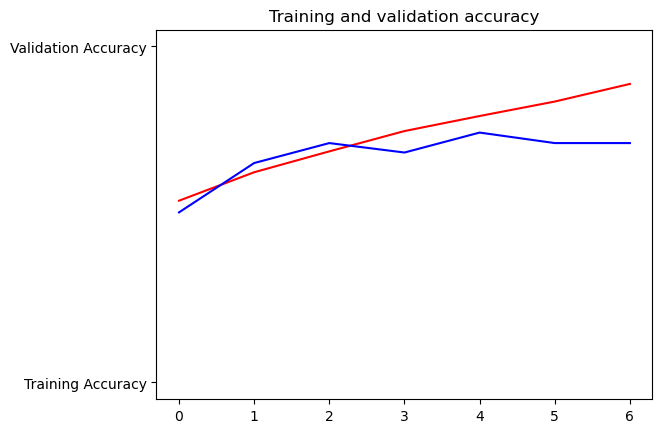

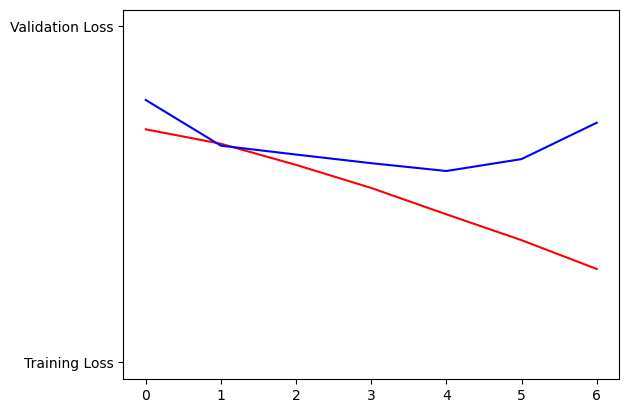

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

### Using SVM


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [14]:
for dirname, _, filenames in os.walk("C:/Users/Malini/Desktop/HappyMonks AI"):
    for filename in filenames:
        os.path.join(dirname, filename)

In [15]:
DATADIR = 'C:/Users/Malini/Desktop/HappyMonks AI'
CATEGORIES = ['cat','dog']
IMG_SIZE=180

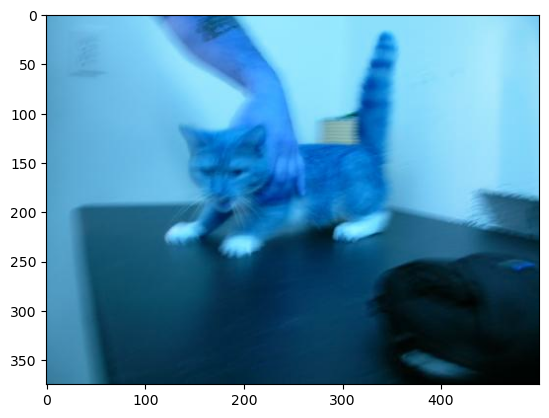

In [16]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [17]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [18]:
print(len(training_data))

3195


In [19]:
lenofimage = len(training_data)

In [20]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [21]:
X.shape

(3195, 97200)

In [22]:
X = X/255.0

In [23]:
X[1]

array([0.14901961, 0.16470588, 0.14509804, ..., 0.09019608, 0.1254902 ,
       0.16470588])

In [24]:
y=np.array(y)

In [25]:
y.shape

(3195,)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [28]:
y2 = svc.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.5506883604505632


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57       402
           1       0.55      0.50      0.53       397

    accuracy                           0.55       799
   macro avg       0.55      0.55      0.55       799
weighted avg       0.55      0.55      0.55       799



In [31]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [38]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
794,0,1
795,0,0
796,0,0
797,1,0
